In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [338]:
# importing data from github

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv ')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


dataset contains 158 rows and 12 columns

happiness score is our output variable and other variables are input variables

In [339]:
df=df.reindex(columns=['Happiness Score','Happiness Rank','Country','Region','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'])

In [340]:
df.head()

,Happiness Score,Happiness Rank,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1,Switzerland,Western Europe,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,2,Iceland,Western Europe,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,3,Denmark,Western Europe,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,4,Norway,Western Europe,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,5,Canada,North America,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


re_indexing our dataset 

In [341]:
df.shape

(158, 12)

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Happiness Rank                 158 non-null    int64  
 2   Country                        158 non-null    object 
 3   Region                         158 non-null    object 
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

apart from Region and Country all are float type. Region and country are object type...

and there is no null values.

In [343]:
df.isnull().sum()

Happiness Score                  0
Happiness Rank                   0
Country                          0
Region                           0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

confirming that there is no null values

In [344]:
df.nunique()

Happiness Score                  157
Happiness Rank                   157
Country                          158
Region                            10
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

In [345]:
df.duplicated().sum()

0

there is no duplicate values are present..

In [346]:
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

Dataset Analaysis

In [347]:
df_w_euro=df[df['Region']=='Western Europe']

In [348]:
df_NAmerica=df[df['Region']=='North America']
df_Ausnz=df[df['Region']=='Australia and New Zealand']

In [349]:
df_MENA=df[df['Region']=='Middle East and Northern Africa']
df_LA_C=df[df['Region']=='Latin America and Caribbean']

In [350]:
df_SEAsia=df[df['Region']=='Southeastern Asia']
df_Central_easteuro=df[df['Region']=='Central and Eastern Europe']

In [351]:
df_East_Asia=df[df['Region']=='Eastern Asia']
df_Sub_Saharan_Africa=df[df['Region']=='Sub-Saharan Africa']
df_Southern_Asia=df[df['Region']=='Southern Asia']

In [352]:
print(df_w_euro.shape)

(21, 12)


In [353]:
print(df_NAmerica.shape)
print(df_Ausnz.shape)
print(df_MENA.shape)
print(df_LA_C.shape)
print(df_SEAsia.shape)
print(df_Central_easteuro.shape)
print(df_East_Asia.shape)
print(df_Sub_Saharan_Africa.shape)
print(df_Southern_Asia.shape)

(2, 12)
(2, 12)
(20, 12)
(22, 12)
(9, 12)
(29, 12)
(6, 12)
(40, 12)
(7, 12)


analysing the data based on Region

In [354]:
weuro=df_w_euro['Happiness Score'].mean()

In [355]:
na=df_NAmerica['Happiness Score'].mean()

In [356]:
anz=df_Ausnz['Happiness Score'].mean()
mena=df_MENA['Happiness Score'].mean()
lac=df_LA_C['Happiness Score'].mean()
sea=df_SEAsia['Happiness Score'].mean()
cee=df_Central_easteuro['Happiness Score'].mean()
ea=df_East_Asia['Happiness Score'].mean()
ssa=df_Sub_Saharan_Africa['Happiness Score'].mean()
sa=df_Southern_Asia['Happiness Score'].mean()

In [357]:
dict1={'Region':['western europe','North America','Aus_Nz','Middle East North Africa','Latin America and Caribbean','SouthEastern Asia','Central and Eastern Europe','Eastern Asia','Sub Saharan Africa','Southern Asia'],'Happiness_Score_Mean':[weuro,na,anz,mena,lac,sea,cee,ea,ssa,sa]}

In [358]:
data=pd.DataFrame(dict1)
data.sort_values(by='Happiness_Score_Mean',ascending=False)

,Region,Happiness_Score_Mean
2,Aus_Nz,7.285000
1,North America,7.273000
0,western europe,6.689619
4,Latin America and Caribbean,6.144682
7,Eastern Asia,5.626167
3,Middle East North Africa,5.406900
6,Central and Eastern Europe,5.332931
5,SouthEastern Asia,5.317444
9,Southern Asia,4.580857
8,Sub Saharan Africa,4.202800


<Axes: ylabel='Region'>

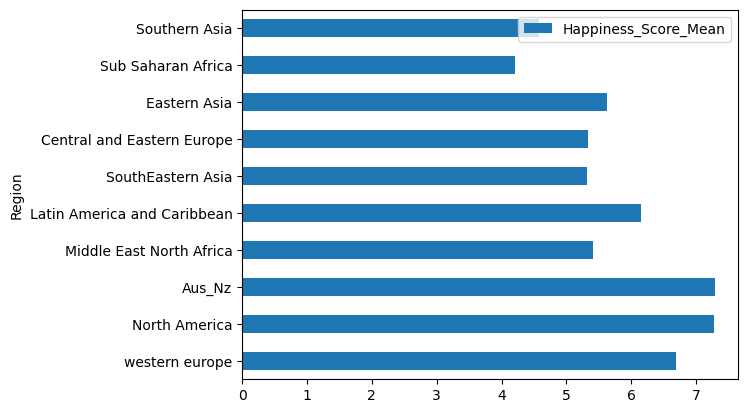

In [359]:
data.plot.barh(x='Region',y='Happiness_Score_Mean')

mean_Happiness_Score is more for Austraia Newzealand and North America Region. very less for sub saharan Africa and Southern Asia.

In [360]:
df.head()

,Happiness Score,Happiness Rank,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1,Switzerland,Western Europe,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,2,Iceland,Western Europe,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,3,Denmark,Western Europe,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,4,Norway,Western Europe,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,5,Canada,North America,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Switzerland has highest Happiness Score

In [361]:
df.tail()

,Happiness Score,Happiness Rank,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,3.465,154,Rwanda,Sub-Saharan Africa,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,155,Benin,Sub-Saharan Africa,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,156,Syria,Middle East and Northern Africa,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,157,Burundi,Sub-Saharan Africa,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,2.839,158,Togo,Sub-Saharan Africa,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


Togo has lowest Happiness Score

analysing the data based on region

# Western Europe

In [362]:
df_w_euro.describe()

,Happiness Score,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,6.689619,29.523810,0.037625,1.298596,1.247302,0.909148,0.549926,0.231463,0.302109,2.151185
std,0.824582,29.268787,0.010144,0.096341,0.135195,0.026834,0.147211,0.150801,0.133845,0.379951
min,4.857000,1.000000,0.018480,1.154060,0.893180,0.874640,0.076990,0.010780,0.000000,1.264620
25%,6.302000,7.000000,0.033280,1.230110,1.219630,0.889110,0.514690,0.135860,0.228230,1.969610
50%,6.937000,19.000000,0.035950,1.302320,1.289070,0.896670,0.614770,0.218430,0.296780,2.123670
75%,7.378000,37.000000,0.042060,1.331710,1.318260,0.923560,0.628770,0.365030,0.362620,2.465700
max,7.587000,102.000000,0.056350,1.563910,1.402230,0.955620,0.669730,0.483570,0.519120,2.702010


maximum Happiness Score for western europe is 7.587 and lowest Happiness Score is 4.8557. also we can observe different parameters also like 25%,50%,75%,std,mean etc

In [363]:
df_w_euro.head()

,Happiness Score,Happiness Rank,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1,Switzerland,Western Europe,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,2,Iceland,Western Europe,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,3,Denmark,Western Europe,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,4,Norway,Western Europe,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,7.406,6,Finland,Western Europe,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955


Top 5 countries for western Europe

In [364]:
df_w_euro.tail()

,Happiness Score,Happiness Rank,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
49,5.948,50,Italy,Western Europe,0.03914,1.25114,1.19777,0.95446,0.26236,0.02901,0.22823,2.02518
65,5.695,66,North Cyprus,Western Europe,0.05635,1.20806,1.07008,0.92356,0.49027,0.14280,0.26169,1.59888
66,5.689,67,Cyprus,Western Europe,0.05580,1.20813,0.89318,0.92356,0.40672,0.06146,0.30638,1.88931
87,5.102,88,Portugal,Western Europe,0.04802,1.15991,1.13935,0.87519,0.51469,0.01078,0.13719,1.26462
101,4.857,102,Greece,Western Europe,0.05062,1.15406,0.92933,0.88213,0.07699,0.01397,0.00000,1.80101


bottom 5 countries for western Europe

# North America

In [365]:
df_NAmerica.describe()

,Happiness Score,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000
mean,7.273000,10.000000,0.036960,1.360400,1.284860,0.88371,0.589505,0.244235,0.429580,2.480935
std,0.217789,7.071068,0.002022,0.048239,0.053387,0.03100,0.061469,0.120682,0.040348,0.041260
min,7.119000,5.000000,0.035530,1.326290,1.247110,0.86179,0.546040,0.158900,0.401050,2.451760
25%,7.196000,7.500000,0.036245,1.343345,1.265985,0.87275,0.567773,0.201568,0.415315,2.466348
50%,7.273000,10.000000,0.036960,1.360400,1.284860,0.88371,0.589505,0.244235,0.429580,2.480935
75%,7.350000,12.500000,0.037675,1.377455,1.303735,0.89467,0.611237,0.286903,0.443845,2.495522
max,7.427000,15.000000,0.038390,1.394510,1.322610,0.90563,0.632970,0.329570,0.458110,2.510110


maximum Happiness Score for North America is 7.427 and lowest Happiness Score is 7.119. also we can observe different parameters also like 25%,50%,75%,std,mean etc

In [366]:
df_NAmerica.head()

,Happiness Score,Happiness Rank,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,7.427,5,Canada,North America,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,7.119,15,United States,North America,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


only 2 countries are present in North America Region.

# Australia and Newzealand Region

In [367]:
df_Ausnz.head()

,Happiness Score,Happiness Rank,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,7.286,9,New Zealand,Australia and New Zealand,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,7.284,10,Australia,Australia and New Zealand,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


only 2 countries are present in Australia and Newzealand Region.

# Middle East and Northern Africa

In [368]:
df_MENA.head()

,Happiness Score,Happiness Rank,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
10,7.278,11,Israel,Middle East and Northern Africa,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
19,6.901,20,United Arab Emirates,Middle East and Northern Africa,0.03729,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743
21,6.853,22,Oman,Middle East and Northern Africa,0.05335,1.36011,1.08182,0.76276,0.63274,0.32524,0.21542,2.47489
27,6.611,28,Qatar,Middle East and Northern Africa,0.06257,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573,1.55674
34,6.411,35,Saudi Arabia,Middle East and Northern Africa,0.04633,1.39541,1.08393,0.72025,0.31048,0.32524,0.13706,2.43872


In [369]:
df_MENA.tail()

,Happiness Score,Happiness Rank,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
109,4.686,110,Iran,Middle East and Northern Africa,0.04449,1.00880,0.54447,0.69805,0.30033,0.05863,0.38086,1.69440
111,4.677,112,Iraq,Middle East and Northern Africa,0.05232,0.98549,0.81889,0.60237,0.00000,0.13788,0.17922,1.95335
134,4.194,135,Egypt,Middle East and Northern Africa,0.03260,0.88180,0.74700,0.61712,0.17288,0.06324,0.11291,1.59927
135,4.077,136,Yemen,Middle East and Northern Africa,0.04367,0.54649,0.68093,0.40064,0.35571,0.07854,0.09131,1.92313
155,3.006,156,Syria,Middle East and Northern Africa,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [370]:
df_MENA.describe()

,Happiness Score,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,5.406900,77.600000,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980008
std,1.101382,43.213546,0.010808,0.319014,0.237590,0.107284,0.169932,0.130588,0.112427,0.543701
min,3.006000,11.000000,0.032600,0.546490,0.474890,0.400640,0.000000,0.045820,0.064310,0.328580
25%,4.707750,38.000000,0.038303,0.881633,0.730483,0.649528,0.258258,0.078368,0.112015,1.727078
50%,5.262000,79.000000,0.044525,1.017220,1.000120,0.721090,0.347435,0.140405,0.167950,1.998595
75%,6.324000,108.500000,0.051323,1.332847,1.092602,0.751060,0.426412,0.268567,0.229975,2.293595
max,7.278000,156.000000,0.078320,1.690420,1.223930,0.913870,0.641570,0.522080,0.471790,3.088540


# Latin America and Caribbean

In [371]:
df_LA_C.head()

,Happiness Score,Happiness Rank,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
11,7.226,12,Costa Rica,Latin America and Caribbean,0.04454,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,3.17728
13,7.187,14,Mexico,Latin America and Caribbean,0.04176,1.02054,0.91451,0.81444,0.48181,0.21312,0.14074,3.60214
15,6.983,16,Brazil,Latin America and Caribbean,0.04076,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574,3.26001
22,6.810,23,Venezuela,Latin America and Caribbean,0.06476,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,3.19131
24,6.786,25,Panama,Latin America and Caribbean,0.04910,1.06353,1.19850,0.79661,0.54210,0.09270,0.24434,2.84848


In [372]:
df_LA_C.tail()

,Happiness Score,Happiness Rank,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
57,5.824,58,Peru,Latin America and Caribbean,0.04615,0.90019,0.97459,0.73017,0.41496,0.05989,0.14982,2.59450
64,5.709,65,Jamaica,Latin America and Caribbean,0.13693,0.81038,1.15102,0.68741,0.50442,0.02299,0.21230,2.32038
97,4.885,98,Dominican Republic,Latin America and Caribbean,0.07446,0.89537,1.17202,0.66825,0.57672,0.14234,0.21684,1.21305
104,4.788,105,Honduras,Latin America and Caribbean,0.05648,0.59532,0.95348,0.69510,0.40148,0.06825,0.23027,1.84408
118,4.518,119,Haiti,Latin America and Caribbean,0.07331,0.26673,0.74302,0.38847,0.24425,0.17175,0.46187,2.24173


In [373]:
df_LA_C.describe()

,Happiness Score,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,6.144682,46.909091,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
std,0.728560,28.716859,0.024361,0.214501,0.143416,0.108986,0.089843,0.060739,0.094168,0.522565
min,4.518000,12.000000,0.040760,0.266730,0.743020,0.388470,0.244250,0.011400,0.058410,1.213050
25%,5.840500,27.750000,0.045753,0.761023,0.983565,0.662798,0.443425,0.083025,0.146760,2.320640
50%,6.149000,41.500000,0.052975,0.909400,1.146430,0.696060,0.519540,0.108260,0.214570,2.709200
75%,6.646000,56.000000,0.063070,1.038315,1.226878,0.789870,0.570315,0.164398,0.269910,2.855148
max,7.226000,119.000000,0.136930,1.211830,1.304770,0.860270,0.633760,0.245580,0.461870,3.602140


# Southeastern Asia


In [374]:
df_SEAsia.head()

,Happiness Score,Happiness Rank,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
23,6.798,24,Singapore,Southeastern Asia,0.03780,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501
33,6.455,34,Thailand,Southeastern Asia,0.03557,0.96690,1.26504,0.73850,0.55664,0.03187,0.57630,2.31945
60,5.770,61,Malaysia,Southeastern Asia,0.04330,1.12486,1.07023,0.72394,0.53024,0.10501,0.33075,1.88541
73,5.399,74,Indonesia,Southeastern Asia,0.02596,0.82827,1.08708,0.63793,0.46611,0.00000,0.51535,1.86399
74,5.360,75,Vietnam,Southeastern Asia,0.03107,0.63216,0.91226,0.74676,0.59444,0.10441,0.16860,2.20173


In [375]:
df_SEAsia.tail()

,Happiness Score,Happiness Rank,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
74,5.360,75,Vietnam,Southeastern Asia,0.03107,0.63216,0.91226,0.74676,0.59444,0.10441,0.16860,2.20173
89,5.073,90,Philippines,Southeastern Asia,0.04934,0.70532,1.03516,0.58114,0.62545,0.12279,0.24991,1.75360
98,4.876,99,Laos,Southeastern Asia,0.06698,0.59066,0.73803,0.54909,0.59591,0.24249,0.42192,1.73799
128,4.307,129,Myanmar,Southeastern Asia,0.04351,0.27108,0.70905,0.48246,0.44017,0.19034,0.79588,1.41805
144,3.819,145,Cambodia,Southeastern Asia,0.05069,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195


In [376]:
df_SEAsia.describe()

,Happiness Score,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,5.317444,81.222222,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
std,0.950020,39.917971,0.012190,0.375874,0.209863,0.158662,0.072075,0.147694,0.189421,0.398172
min,3.819000,24.000000,0.025960,0.271080,0.627360,0.482460,0.440170,0.000000,0.168600,0.981950
25%,4.876000,61.000000,0.035570,0.590660,0.738030,0.581140,0.530240,0.072470,0.311050,1.737990
50%,5.360000,75.000000,0.043300,0.705320,1.020000,0.637930,0.556640,0.105010,0.403590,1.863990
75%,5.770000,99.000000,0.049340,0.966900,1.070230,0.738500,0.595910,0.190340,0.515350,1.885410
max,6.798000,145.000000,0.066980,1.521860,1.265040,1.025250,0.662460,0.492100,0.795880,2.319450


# Central and Eastern Europe

In [377]:
df_Central_easteuro.head()

,Happiness Score,Happiness Rank,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
30,6.505,31,Czech Republic,Central and Eastern Europe,0.04168,1.17898,1.20643,0.84483,0.46364,0.02652,0.10686,2.67782
43,6.003,44,Uzbekistan,Central and Eastern Europe,0.04361,0.63244,1.34043,0.59772,0.65821,0.30826,0.22837,2.23741
44,5.995,45,Slovakia,Central and Eastern Europe,0.04267,1.16891,1.26999,0.78902,0.31751,0.03431,0.16893,2.24639
51,5.889,52,Moldova,Central and Eastern Europe,0.03799,0.59448,1.01528,0.61826,0.32818,0.01615,0.20951,3.10712
53,5.855,54,Kazakhstan,Central and Eastern Europe,0.04114,1.12254,1.12241,0.64368,0.51649,0.08454,0.11827,2.24729


In [378]:
df_Central_easteuro.tail()

,Happiness Score,Happiness Rank,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
105,4.786,106,Tajikistan,Central and Eastern Europe,0.03198,0.39047,0.85563,0.57379,0.47216,0.15072,0.22974,2.11399
110,4.681,111,Ukraine,Central and Eastern Europe,0.04412,0.79907,1.20278,0.67390,0.25123,0.02961,0.15275,1.57140
126,4.350,127,Armenia,Central and Eastern Europe,0.04763,0.76821,0.77711,0.72990,0.19847,0.03900,0.07855,1.75873
129,4.297,130,Georgia,Central and Eastern Europe,0.04221,0.74190,0.38562,0.72926,0.40577,0.38331,0.05547,1.59541
133,4.218,134,Bulgaria,Central and Eastern Europe,0.04828,1.01216,1.10614,0.76649,0.30587,0.00872,0.11921,0.89991


In [379]:
df_Central_easteuro.describe()

,Happiness Score,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,5.332931,79.000000,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
std,0.570446,26.667262,0.008952,0.218499,0.217005,0.081339,0.130925,0.100134,0.075955,0.468624
min,4.218000,31.000000,0.031350,0.390470,0.385620,0.538860,0.092450,0.002270,0.001990,0.899910
25%,4.959000,59.000000,0.040130,0.801480,0.905570,0.650880,0.258830,0.026520,0.106860,1.739330
50%,5.286000,77.000000,0.042670,1.012160,1.106140,0.731280,0.350680,0.042120,0.152750,2.025000
75%,5.813000,95.000000,0.048640,1.122540,1.227910,0.773610,0.448880,0.142960,0.209510,2.246390
max,6.505000,134.000000,0.069130,1.184980,1.340430,0.873370,0.658210,0.383310,0.300300,3.107120


# Eastern Asia


In [380]:
df_East_Asia.head()

,Happiness Score,Happiness Rank,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
37,6.298,38,Taiwan,Eastern Asia,0.03868,1.29098,1.07617,0.87530,0.39740,0.08129,0.25376,2.32323
45,5.987,46,Japan,Eastern Asia,0.03581,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,1.68435
46,5.984,47,South Korea,Eastern Asia,0.04098,1.24461,0.95774,0.96538,0.33208,0.07857,0.18557,2.21978
71,5.474,72,Hong Kong,Eastern Asia,0.05051,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478,0.65429
83,5.140,84,China,Eastern Asia,0.02424,0.89012,0.94675,0.81658,0.51697,0.02781,0.08185,1.86040


In [381]:
df_East_Asia.tail()

,Happiness Score,Happiness Rank,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
45,5.987,46,Japan,Eastern Asia,0.03581,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,1.68435
46,5.984,47,South Korea,Eastern Asia,0.04098,1.24461,0.95774,0.96538,0.33208,0.07857,0.18557,2.21978
71,5.474,72,Hong Kong,Eastern Asia,0.05051,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478,0.65429
83,5.140,84,China,Eastern Asia,0.02424,0.89012,0.94675,0.81658,0.51697,0.02781,0.08185,1.86040
99,4.874,100,Mongolia,Eastern Asia,0.03313,0.82819,1.30060,0.60268,0.43626,0.02666,0.33230,1.34759


In [382]:
df_East_Asia.describe()

,Happiness Score,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,5.626167,64.500000,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
std,0.554053,24.688054,0.008719,0.232465,0.148973,0.153824,0.093679,0.131807,0.124193,0.616479
min,4.874000,38.000000,0.024240,0.828190,0.946750,0.602680,0.332080,0.026660,0.081850,0.654290
25%,5.223500,46.250000,0.033800,0.978743,0.982850,0.831260,0.407115,0.040500,0.126680,1.431780
50%,5.729000,59.500000,0.037245,1.257675,1.067175,0.920340,0.466205,0.079930,0.219665,1.772375
75%,5.986250,81.000000,0.040405,1.285920,1.211882,0.984678,0.511765,0.155773,0.312665,2.129935
max,6.298000,100.000000,0.050510,1.386040,1.300600,1.013280,0.596080,0.371240,0.394780,2.323230


# Sub-Saharan Africa

In [383]:
df_Sub_Saharan_Africa.head()

,Happiness Score,Happiness Rank,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
70,5.477,71,Mauritius,Sub-Saharan Africa,0.07197,1.00761,0.98521,0.70950,0.56066,0.07521,0.37744,1.76145
77,5.268,78,Nigeria,Sub-Saharan Africa,0.04192,0.65435,0.90432,0.16007,0.34334,0.04030,0.27233,2.89319
84,5.129,85,Zambia,Sub-Saharan Africa,0.06988,0.47038,0.91612,0.29924,0.48827,0.12468,0.19591,2.63430
90,5.057,91,Somaliland region,Sub-Saharan Africa,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032
93,4.971,94,Mozambique,Sub-Saharan Africa,0.07896,0.08308,1.02626,0.09131,0.34037,0.15603,0.22269,3.05137


In [384]:
df_Sub_Saharan_Africa.tail()

,Happiness Score,Happiness Rank,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
151,3.587,152,Burkina Faso,Sub-Saharan Africa,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
153,3.465,154,Rwanda,Sub-Saharan Africa,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,155,Benin,Sub-Saharan Africa,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
156,2.905,157,Burundi,Sub-Saharan Africa,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,2.839,158,Togo,Sub-Saharan Africa,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [385]:
df_Sub_Saharan_Africa.describe()

,Happiness Score,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,4.202800,127.900000,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980
std,0.609557,22.863923,0.018757,0.282264,0.267819,0.145906,0.120693,0.096941,0.080912,0.553476
min,2.839000,71.000000,0.034640,0.000000,0.000000,0.000000,0.100810,0.030600,0.068220,0.670420
25%,3.756000,115.750000,0.041307,0.203863,0.676658,0.165140,0.301262,0.072307,0.182598,1.669332
50%,4.272000,132.000000,0.047775,0.308445,0.878375,0.298155,0.382910,0.103875,0.207305,1.950050
75%,4.580750,146.250000,0.067303,0.483052,1.001570,0.372123,0.462010,0.132890,0.243342,2.458260
max,5.477000,158.000000,0.110680,1.060240,1.184680,0.709500,0.592010,0.551910,0.503180,3.051370


# Southern Asia

In [386]:
df_Southern_Asia.head()

,Happiness Score,Happiness Rank,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
78,5.253,79,Bhutan,Southern Asia,0.03225,0.77042,1.10395,0.57407,0.53206,0.15445,0.47998,1.63794
80,5.194,81,Pakistan,Southern Asia,0.03726,0.59543,0.41411,0.51466,0.12102,0.10464,0.33671,3.10709
108,4.694,109,Bangladesh,Southern Asia,0.03077,0.39753,0.43106,0.60164,0.40820,0.12569,0.21222,2.51767
116,4.565,117,India,Southern Asia,0.02043,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,2.27513
120,4.514,121,Nepal,Southern Asia,0.03607,0.35997,0.86449,0.56874,0.38282,0.05907,0.32296,1.95637


In [387]:
df_Southern_Asia.tail()

,Happiness Score,Happiness Rank,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
108,4.694,109,Bangladesh,Southern Asia,0.03077,0.39753,0.43106,0.60164,0.40820,0.12569,0.21222,2.51767
116,4.565,117,India,Southern Asia,0.02043,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,2.27513
120,4.514,121,Nepal,Southern Asia,0.03607,0.35997,0.86449,0.56874,0.38282,0.05907,0.32296,1.95637
131,4.271,132,Sri Lanka,Southern Asia,0.03751,0.83524,1.01905,0.70806,0.53726,0.09179,0.40828,0.67108
152,3.575,153,Afghanistan,Southern Asia,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210


In [388]:
df_Southern_Asia.describe()

,Happiness Score,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,4.580857,113.142857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
std,0.570526,26.573349,0.005933,0.205185,0.337682,0.123343,0.151113,0.030494,0.088660,0.760337
min,3.575000,79.000000,0.020430,0.319820,0.302850,0.303350,0.121020,0.059070,0.212220,0.671080
25%,4.392500,95.000000,0.030805,0.378750,0.397925,0.514975,0.308480,0.088355,0.293855,1.795020
50%,4.565000,117.000000,0.032250,0.595430,0.431060,0.568740,0.397860,0.097190,0.336710,1.956370
75%,4.944000,126.500000,0.036665,0.707705,0.941770,0.587855,0.470130,0.115165,0.386690,2.396400
max,5.253000,153.000000,0.037510,0.835240,1.103950,0.708060,0.537260,0.154450,0.479980,3.107090


we can observe top and bottom 5 countries for all region and also we can observe max and min happines score for each region.

In [389]:
df.head()

,Happiness Score,Happiness Rank,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1,Switzerland,Western Europe,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,2,Iceland,Western Europe,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,3,Denmark,Western Europe,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,4,Norway,Western Europe,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,5,Canada,North America,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


converting categorical data into numerical data

In [390]:
from sklearn.preprocessing import LabelEncoder

In [391]:
le=LabelEncoder()

In [392]:
df['Country']=le.fit_transform(df.Country)
df['Region']=le.fit_transform(df.Region)

In [393]:
df.head()

,Happiness Score,Happiness Rank,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1,135,9,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,2,58,9,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,3,37,9,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,4,105,9,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,5,24,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Happiness Rank                 158 non-null    int64  
 2   Country                        158 non-null    int32  
 3   Region                         158 non-null    int32  
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int32(2), int64(1)
memory usage: 13

categorical data converted to numerical data 

In [395]:
df.describe()

,Happiness Score,Happiness Rank,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,79.493671,78.500000,5.120253,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,45.754363,45.754781,2.993321,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,1.000000,0.000000,0.000000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,40.250000,39.250000,3.000000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,79.500000,78.500000,4.500000,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,118.750000,117.750000,8.000000,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,158.000000,157.000000,9.000000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


all columns count is 158.

mean is greater than median in (Happiness Score,Region,Standard Error,Trust,generosity,dystopia Residual).

mean is less than median in(Happiness Rank,Economy,Family).

mean is equal to median in (Country).

standard deviation for country and Happiness Rank is more.

Happiness Score                     Axes(0.125,0.653529;0.168478x0.226471)
Happiness Rank                   Axes(0.327174,0.653529;0.168478x0.226471)
Country                          Axes(0.529348,0.653529;0.168478x0.226471)
Region                           Axes(0.731522,0.653529;0.168478x0.226471)
Standard Error                      Axes(0.125,0.381765;0.168478x0.226471)
Economy (GDP per Capita)         Axes(0.327174,0.381765;0.168478x0.226471)
Family                           Axes(0.529348,0.381765;0.168478x0.226471)
Health (Life Expectancy)         Axes(0.731522,0.381765;0.168478x0.226471)
Freedom                                 Axes(0.125,0.11;0.168478x0.226471)
Trust (Government Corruption)        Axes(0.327174,0.11;0.168478x0.226471)
Generosity                           Axes(0.529348,0.11;0.168478x0.226471)
Dystopia Residual                    Axes(0.731522,0.11;0.168478x0.226471)
dtype: object

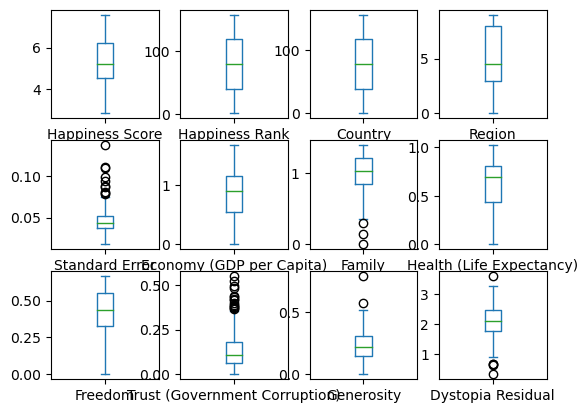

In [396]:
df.plot(kind='box',subplots=True,layout=(3,4))

standard error and trust contains some outliers.

In [397]:
from scipy.stats import zscore

In [398]:
z=np.abs(zscore(df))

In [399]:
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))


In [400]:
df=df[(z<3).all(axis=1)]  # removing outliers

In [401]:
df.shape

(149, 12)

In [402]:
df.corr()

,Happiness Score,Happiness Rank,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.992921,0.120109,-0.145850,-0.230252,0.773577,0.720868,0.729191,0.585066,0.477692,0.250903,0.528334
Happiness Rank,-0.992921,1.000000,-0.125380,0.184520,0.212085,-0.773651,-0.720359,-0.736758,-0.571089,-0.445743,-0.225626,-0.526680
Country,0.120109,-0.125380,1.000000,0.007739,0.003898,0.039300,0.202403,0.036875,0.091495,0.062379,0.096685,0.048980
Region,-0.145850,0.184520,0.007739,1.000000,-0.013860,-0.224928,-0.127749,-0.334531,0.101335,0.167550,0.305791,-0.059494
Standard Error,-0.230252,0.212085,0.003898,-0.013860,1.000000,-0.251749,-0.137879,-0.356444,-0.186465,-0.140156,-0.131970,0.045722
Economy (GDP per Capita),0.773577,-0.773651,0.039300,-0.224928,-0.251749,1.000000,0.628589,0.817470,0.376780,0.342269,0.020730,0.026936
Family,0.720868,-0.720359,0.202403,-0.127749,-0.137879,0.628589,1.000000,0.503890,0.474229,0.258646,0.154011,0.118062
Health (Life Expectancy),0.729191,-0.736758,0.036875,-0.334531,-0.356444,0.817470,0.503890,1.000000,0.382595,0.270605,0.129328,0.031212
Freedom,0.585066,-0.571089,0.091495,0.101335,-0.186465,0.376780,0.474229,0.382595,1.000000,0.506373,0.428718,0.058596
Trust (Government Corruption),0.477692,-0.445743,0.062379,0.167550,-0.140156,0.342269,0.258646,0.270605,0.506373,1.000000,0.296450,0.078080


<Axes: >

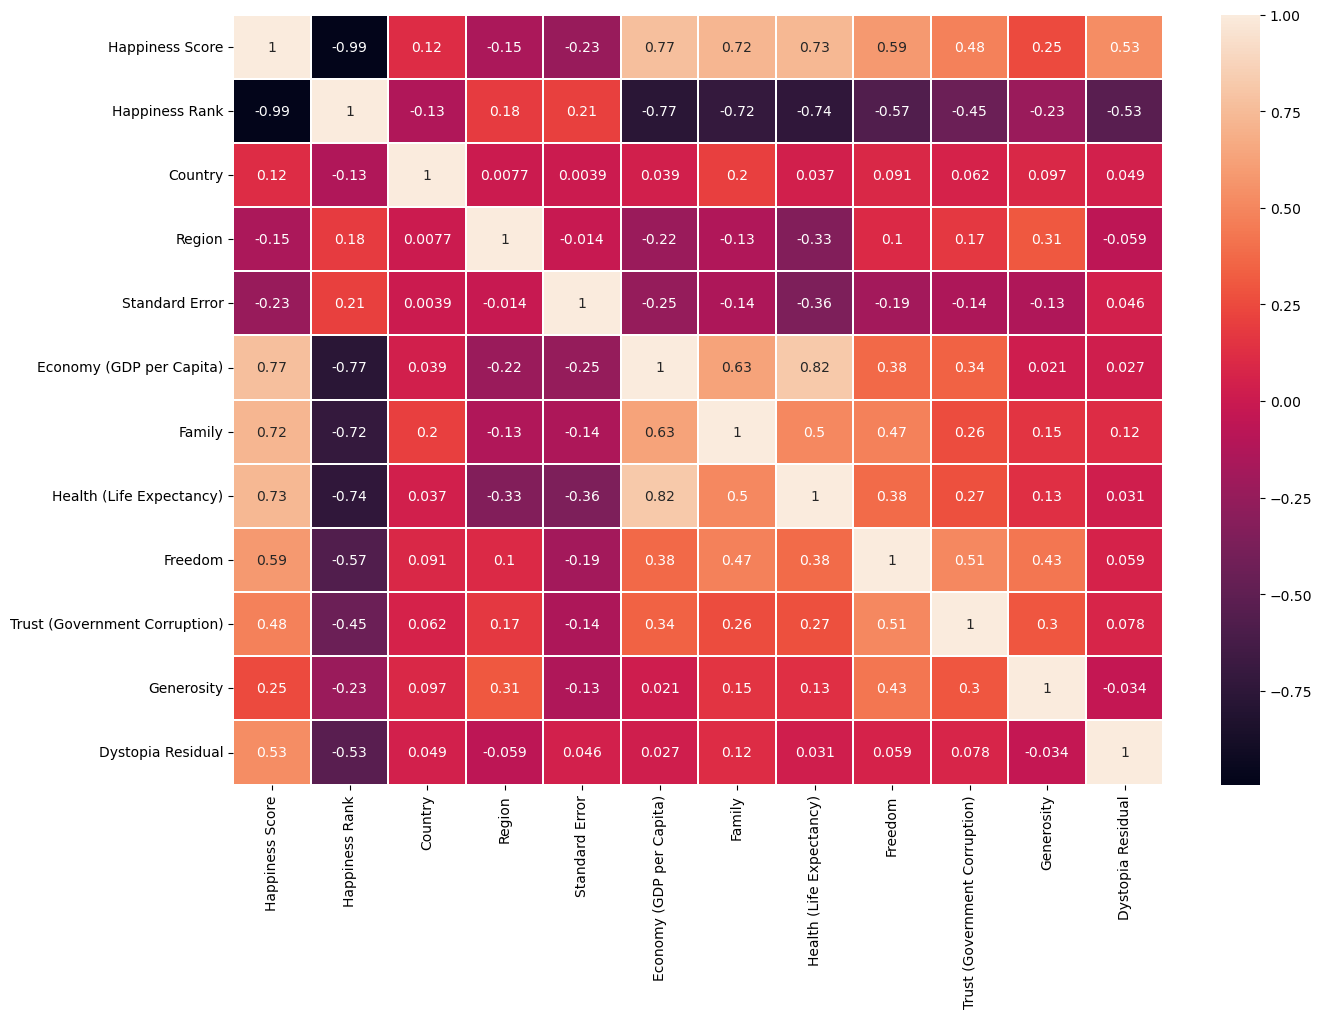

In [403]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.3)

happiness rank,region,standard error are negatively correlated with happiness score.

Generosity,Dystopia Residual,Trust,Freedom,Health,Family,Economy,Country positively correlated with Happiness score.

economy, family , health highly correlated with happiness score.

health and economy are highly correlated with each other.

family and economy also correlated with each other.

In [404]:
df.columns

Index(['Happiness Score', 'Happiness Rank', 'Country', 'Region',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

<Axes: xlabel='Family', ylabel='Economy (GDP per Capita)'>

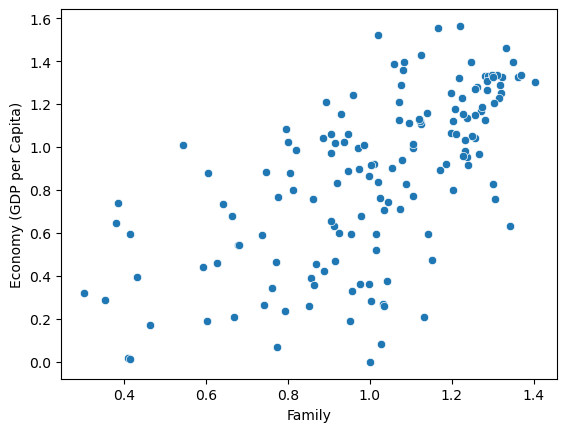

In [405]:
sns.scatterplot(x='Family',y='Economy (GDP per Capita)',data=df)

<Axes: xlabel='Health (Life Expectancy)', ylabel='Economy (GDP per Capita)'>

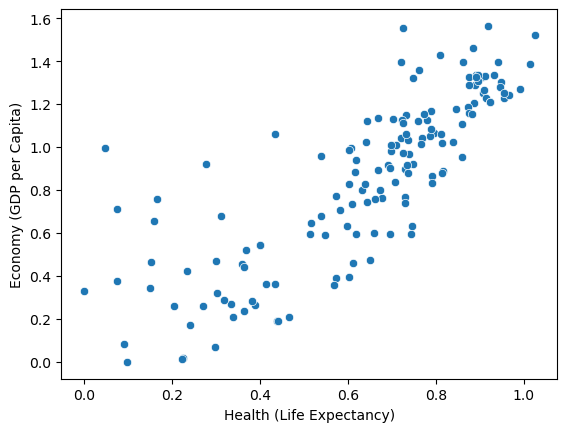

In [406]:
sns.scatterplot(x='Health (Life Expectancy)',y='Economy (GDP per Capita)',data=df)

<Axes: xlabel='Health (Life Expectancy)', ylabel='Family'>

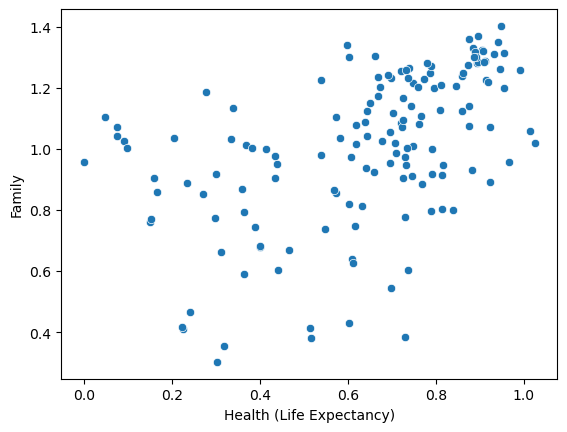

In [407]:
sns.scatterplot(x='Health (Life Expectancy)',y='Family',data=df)

In [408]:
# df.drop('Family',axis=1,inplace=True)

In [409]:
#df.drop('Economy (GDP per Capita)',axis=1,inplace=True)          # dropping one column

In [410]:
df.head()

,Happiness Score,Happiness Rank,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1,135,9,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,2,58,9,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,3,37,9,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,4,105,9,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,5,24,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [411]:
df['Family']=np.log(df['Family'])

In [412]:
df.drop(['Happiness Rank','Country','Region'],axis=1,inplace=True)
df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,0.299742,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,0.338064,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,0.307911,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,0.285893,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,0.279607,0.90563,0.63297,0.32957,0.45811,2.45176


In [413]:
# dividing the data into 2 parts.

x=df.iloc[:,1:]
y=df.iloc[:,0]

In [414]:
x.shape

(149, 8)

In [415]:
y.shape

(149,)

In [416]:
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

In [417]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,0.299742,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,0.338064,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,0.307911,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,0.285893,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,0.279607,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,0.05141,0.46534,-0.259872,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.04324,0.25812,-0.160310,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.03084,0.31982,-1.194518,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.03656,0.28665,-1.038854,0.31910,0.48450,0.08010,0.18260,1.63328


In [418]:
from sklearn.preprocessing import StandardScaler

In [419]:
st=StandardScaler()

In [420]:
x=pd.DataFrame(st.fit_transform(x),columns=x.columns)
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.866786,1.381916,1.077982,1.235390,1.583704,2.472255,0.546305,0.756876
1,0.185669,1.138324,1.202544,1.261541,1.338953,0.009247,1.713898,1.109300
2,-0.926089,1.198220,1.104536,0.962900,1.476027,3.036747,0.919630,0.708507
3,-0.531687,1.543526,1.032970,1.006023,1.611371,1.987759,0.966495,0.657485
4,-0.765327,1.200315,1.012538,1.089333,1.366887,1.673965,1.896418,0.631620
...,...,...,...,...,...,...,...,...
144,0.369294,-1.026255,-0.740965,-1.985941,0.274090,0.343483,-0.249803,-1.343100
145,-0.214450,-1.562163,-0.417350,-1.498813,-0.216276,-0.106943,-0.117411,-1.252030
146,-1.100427,-1.402596,-3.778900,-1.367851,-1.285662,-0.382420,1.118051,-0.322135
147,-0.691734,-1.488379,-3.272937,-1.303594,0.379439,-0.533653,-0.409226,-0.930702


I am not able solve overfitting issue.

tried by dropping highly correlated features.(by dropping different different features).

removed skewness and built the model but getting wrong values.

did parameter tuning also but not getting proper cross validation score.

tried by dropping multiple columns also.

only ridge and linear regressor are performing well.



# Model Building

In [421]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
l=LinearRegression()

In [422]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [423]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(104, 8)
(104,)
(45, 8)
(45,)


In [424]:
l.fit(x_train,y_train)

LinearRegression()

In [425]:
pred=l.predict(x_test)

In [426]:
print(r2_score(y_test,pred))

0.9990077290955042


In [427]:
mae=mean_absolute_error(y_test,pred)
mse=mean_squared_error(y_test,pred)
rmse=np.sqrt(mse)

In [428]:
print(mae)
print(mse)
print(rmse)

0.02987829059330785
0.0011843161688362875
0.0344138949965895


In [429]:
acc=r2_score(y_test,pred)*100
acc

99.90077290955041

In [430]:
from sklearn.model_selection import cross_val_score as cv

In [431]:
cvs=cv(l,x,y)

In [432]:
val=acc-(cvs.mean())*100
val

4.6021507193554925

In [433]:
cvscore=cvs.mean()*100
cvscore

95.29862219019492

# Ridge Regressor

In [434]:
from sklearn.linear_model import Ridge
rdg=Ridge()
rdg.fit(x_train,y_train)
pred1=rdg.predict(x_test)
acc1=r2_score(y_test,pred1)*100
acc1

99.8843747488395

In [435]:
cvs1=cv(rdg,x,y)             # calculating cross value score 

In [436]:
val1=acc1-(cvs1.mean())*100
val1

4.770993628118234

In [437]:
cvscore1=cvs1.mean()*100
cvscore1

95.11338112072127

# RandomForestRegressor

In [438]:
from sklearn.ensemble import RandomForestRegressor

In [439]:
rf=RandomForestRegressor()

In [440]:
#para={'max_depth':[1,2,3,4],'min_samples_split':[2,3,4,5],'min_samples_leaf':[1,2,3,4],'n_estimators':[50,100,150,200],'random_state':[38,42,50,75],'max_leaf_nodes':[1,2,3,4]}

In [441]:
#from sklearn.model_selection import  GridSearchCV
#gv=GridSearchCV(estimator=rf,param_grid=para)

#gv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'max_leaf_nodes': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 150, 200],
                         'random_state': [38, 42, 50, 75]})

# gv.best_params_

{'max_depth': 3,
 'max_leaf_nodes': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 150,
 'random_state': 38}

gv.best_score_

In [442]:
rf=RandomForestRegressor(max_depth=3,max_leaf_nodes=4,min_samples_leaf=4,min_samples_split=2,n_estimators=150,random_state=38)

In [443]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=3, max_leaf_nodes=4, min_samples_leaf=4,
                      n_estimators=150, random_state=38)

In [444]:
pred2=rf.predict(x_test)

In [445]:
acc2=r2_score(y_test,pred1)*100
acc2

99.8843747488395

In [446]:
cvs2=cv(rf,x,y)

In [447]:
cvscore2=cvs2.mean()*100
cvscore2

-811.3300181658947

In [448]:
val2=acc2-(cvs2.mean())*100
val2

911.2143929147342

# ExtraTreesRegressor

In [449]:
from sklearn.ensemble import ExtraTreesRegressor

In [450]:
ext=ExtraTreesRegressor()

In [451]:
ext.fit(x_train,y_train)

ExtraTreesRegressor()

In [452]:
pred3=ext.predict(x_test)

In [453]:
acc3=r2_score(y_test,pred3)*100
acc3

92.54048880836872

# AdaBoostRegressor

In [454]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()

In [455]:
abr.fit(x_train,y_train)

AdaBoostRegressor()

In [456]:
pred4=abr.predict(x_test)

In [457]:
acc4=r2_score(y_test,pred4)*100
acc4

84.29672629757752

# GradientBoostingRegressor

In [458]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [459]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [460]:
pred5=gbr.predict(x_test)

In [461]:
acc5=r2_score(y_test,pred5)*100
acc5

93.37169178672161